# Demo of Whittaker filter
Spectra are often corrupted by uncorrelated random noise. As such, smoothing is frequently a useful option to improve the quality of the spectra for visualization but also for chemometric analysis. Frequently, Savitzky-Golay smoothing is used. It however has some drawback such as:
- two parameters which need to be optimized
- parameters may not be varied continously (integer values required)
- speed
- choose ideal parameters poses a challenge

Eilers et al. [1] proposed to use a Whittaker smoother instead, which improves on all three points. The chemometrics toolbox implements the Whittaker smoother with additional gimics such as automatic estimation of the ideal smoothing parameter. The following example shows how the Whittaker smoother may be applied based on artificial data. First, the necessary libraries are imported.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import chemometrics as cm
import matplotlib.pyplot as plt

Here, we want to mimique Raman spectra with a broad background contribution. `generate_spectra` and `generate_background` are helper functions exactly for this application. `generate_spectra` generates a spectra with Gaussian peak of random intensity and peak width. `generate_background` uses a Gaussian process for generating broad background features. By adding the output of the two functions, an artificial spectrum is generated.

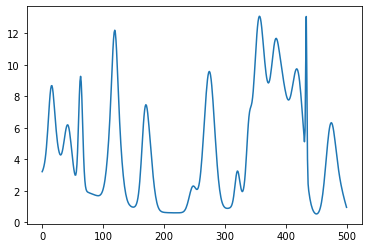

In [2]:
n_wl = 500
n_band = 20
bandwidth = 3
n_samples = 50
S = cm.generate_background(n_wl) * 3 + cm.generate_spectra(n_wl, n_band,
                                                       bandwidth)
plt.plot(S.T)

Using some randomly generated concentrations and adding Gaussian noise, a number of spectra are obtained. The spectra can now be plotted with the `plot_colored_series` function. The spectra spectra are colored by concentration for easier distinction.

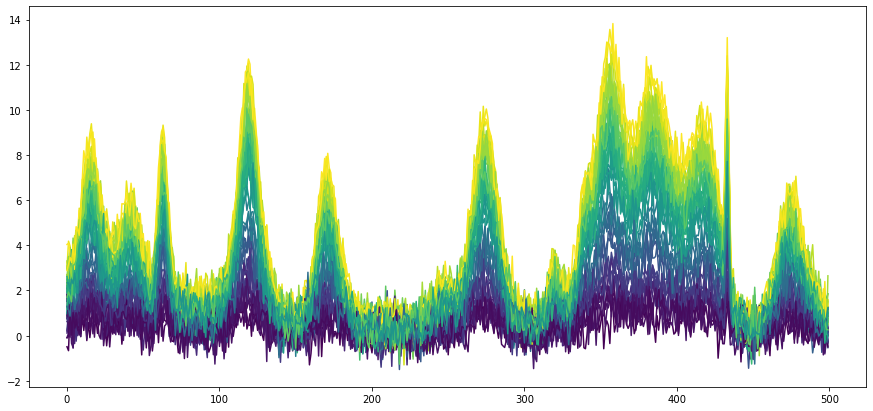

In [3]:
C = np.random.uniform(size=n_samples)
X = C[:,None] * S
X = X + np.random.normal(size=X.shape, scale=0.5)

plt.figure(figsize=(15, 7))
lines = cm.plot_colored_series(X.T, reference=C)

The `Whittaker` class provides a score parameter which is based on a leave-one-out cross-validation. The score provides an estimate for the mean error after smoothing. This can be tested for the artificial spectra. The penalty is iteratively varied over 5 orders of magnitude and after each iteration the score is read out. Finally, the scores are plotted against the penalty.

[]

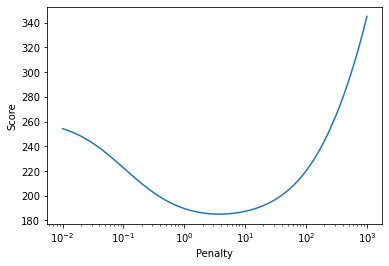

In [4]:
n_points = 100

penalties = 10 ** np.linspace(-2, 3, n_points)
scores = np.zeros(penalties.shape)

whittaker = cm.Whittaker(penalty=1)

for i in range(n_points):
    whittaker.penalty_ = penalties[i]
    whittaker.fit(X)
    scores[i] = whittaker.score(X)
    
plt.plot(penalties, scores,)
plt.xlabel('Penalty')
plt.ylabel('Score')
ax = plt.gca()
ax.semilogx()


The penalty versus score plot shows that there is a local minimum, i.e. an optimal penalty. By not defining a penalty when initializing the Whittaker filter (or setting the penalty to `'auto'`), the `Whittaker` class runs an optimizer to find an optimal penalty. For routine applications and quick testing, this should however be a reasonable starting point. This is shown below, `Whittaker` is initialized without penalty. The smoothed spectra are shown below with the original spectrum shown in red for comparison.

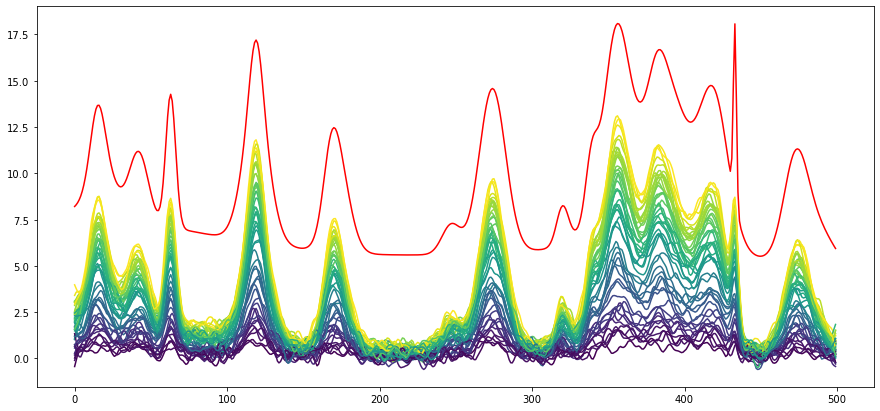

In [5]:
whittaker = cm.Whittaker()
X_smoothed = whittaker.fit_transform(X)
plt.figure(figsize=(15, 7))
lines = cm.plot_colored_series(X_smoothed.T, reference=C)
plt.plot(S.T + 5, 'r')

In [6]:
whittaker.penalty_

3.758941697978874